In [1]:
%matplotlib inline
import cartopy.crs as ccrs
import xarray as xr
import os
import matplotlib.pyplot as plt
import numpy as np
import math 
import sys

In [2]:
import cartopy
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature, RIVERS
import seaborn as sns
from shapely.geometry import LinearRing, MultiPoint, MultiPolygon
from shapely.geometry.point import Point
import shapely.geometry as geometry
from shapely.ops import cascaded_union, polygonize
from scipy.spatial import Delaunay
from descartes import PolygonPatch

In [3]:
direc = '/u/home/gergel/agu_runs/reg_run'
test_filename = 'fluxes_daily.1989-09-01.nc'
fluxes = xr.open_dataset(os.path.join(direc, test_filename))
soil_temps = fluxes.OUT_SOIL_TNODE
soil_temps_node = soil_temps.isel(node=8)

In [61]:
scale = '50m'

plt.rcParams.update({'mathtext.default':  'regular' })

class Rasm(ccrs.Projection):

    def __init__(self):

        proj4_params = {'R': 6371200.0,
                        'lat_0': 90.0,
                        'lat_1': 90,
                        'lat_2': 90,
                        'lon_0': -114.0+360,
                        'proj': 'lcc',
                        'units': 'm',
                        'x_0': 9469302.950316086,
                        'y_0': 6201952.603370549}

        super(Rasm, self).__init__(proj4_params)

    @property
    def boundary(self):
        coords = ((self.x_limits[0], self.y_limits[0]),(self.x_limits[1], self.y_limits[0]),
                  (self.x_limits[1], self.y_limits[1]),(self.x_limits[0], self.y_limits[1]),
                  (self.x_limits[0], self.y_limits[0]))

        return ccrs.sgeom.Polygon(coords).exterior

    @property
    def threshold(self):
        return 100000.0

    @property
    def x_limits(self):
        return (0, 16423961.103252266)

    @property
    def y_limits(self):
        return (0, 12228062.194885937)

In [5]:
sys.path

['',
 '/u/home/gergel/miniconda3/envs/pangeo/lib/python36.zip',
 '/u/home/gergel/miniconda3/envs/pangeo/lib/python3.6',
 '/u/home/gergel/miniconda3/envs/pangeo/lib/python3.6/lib-dynload',
 '/u/home/gergel/miniconda3/envs/pangeo/lib/python3.6/site-packages',
 '/u/home/gergel/miniconda3/envs/pangeo/lib/python3.6/site-packages/IPython/extensions',
 '/u/US_HOME2/gergel/.ipython']

In [6]:
# sys.path.insert(1,'/u/US_HOME2/gergel/miniconda3/envs/pangeo/bin')

In [58]:
coords_rasm = Rasm()

In [106]:
da_soil_temps_node = soil_temps_node.isel(time=0)
da_soil_temps_node.coords['xc'] = fluxes.xc
da_soil_temps_node.coords['yc'] = fluxes.yc

In [107]:
da_soil_temps_node.coords

Coordinates:
    time     datetime64[ns] 1989-09-01
    xc       (nj, ni) float64 -170.8 -170.6 -170.4 -170.3 -170.1 -169.9 ...
    yc       (nj, ni) float64 16.53 16.78 17.02 17.27 17.51 17.76 18.0 18.25 ...

TypeError: __call__() takes 1 positional argument but 3 were given

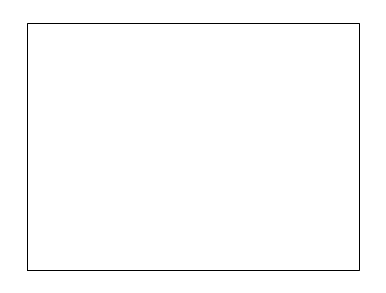

In [113]:
fig, ax = plt.subplots(figsize=(7, 5), subplot_kw=dict(projection=Rasm()))

lw = 2.0

'''soil_temps_node.isel(time=0).plot.contour(fluxes.xc, fluxes.yc, 
                                             ax=ax, 
                                             transform=ccrs.PlateCarree())'''

# da_soil_temps_node.plot('xc', 'yc', ax=ax, transform=ccrs.PlateCarree())

# plt.colorbar(mappable=m)

# da_soil_temps_node.plot.pcolormesh('xc', 'yc', ax=ax, transform=ccrs.PlateCarree())

# ax.pcolormesh(fluxes.xc, fluxes.yc, soil_temps_node.isel(time=0).to_masked_array(), transform=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.3, linestyle='--')

g1 = ax.coastlines()

# ax.stock_img()

plt.show()

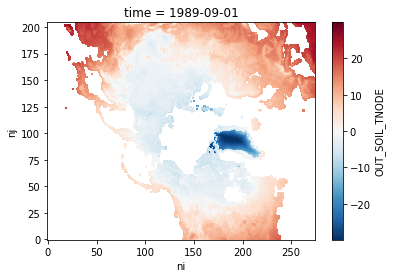

In [48]:
soil_temps_node.isel(time=0).plot()